In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from os import path
import itertools as it

cloud_names = [
    '/home/aq85800/NewVolume/SpacetimeGaussians/output/techni_lite_noprior48/cloud+0transparent+paving+67mocap+48frames+single_camera/loss_history.csv',
    '/home/aq85800/NewVolume/SpacetimeGaussians/output/techni_lite_noprior48/cloud+0transparent+paving+67mocap+48frames+20250319/loss_history.csv',
    '/home/aq85800/NewVolume/SpacetimeGaussians/output/techni_lite_noprior48/cloud+0transparent+paving+67mocap+48frames+nograze/loss_history.csv',
    '/home/aq85800/NewVolume/SpacetimeGaussians/output/techni_lite_noprior48/cloud+0transparent+paving+67mocap+48frames+nograze+single_camera/loss_history.csv',
]

plot_tails = [5000, 1000]
tails_data_resolution = 10

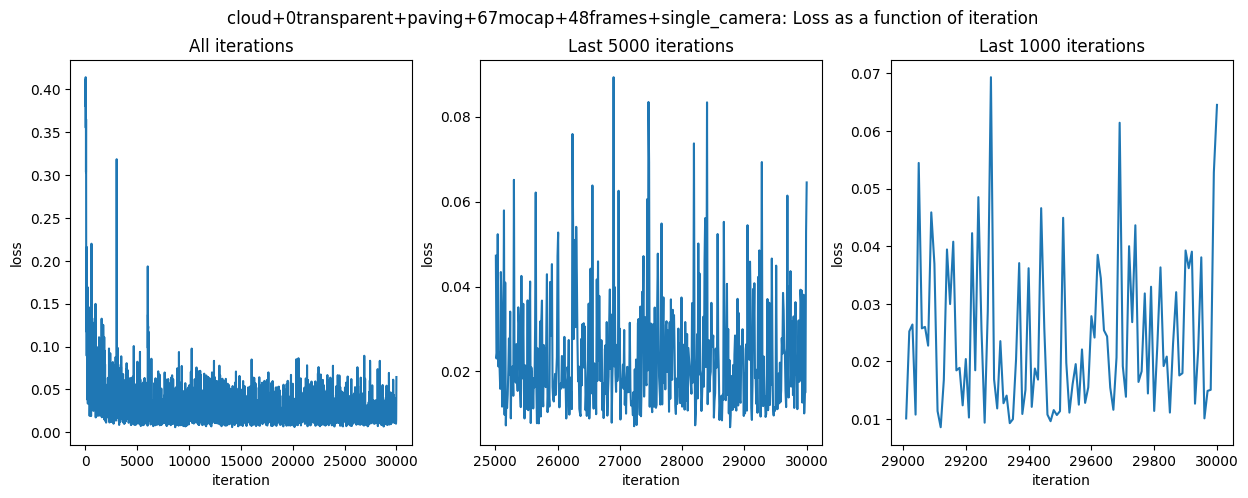

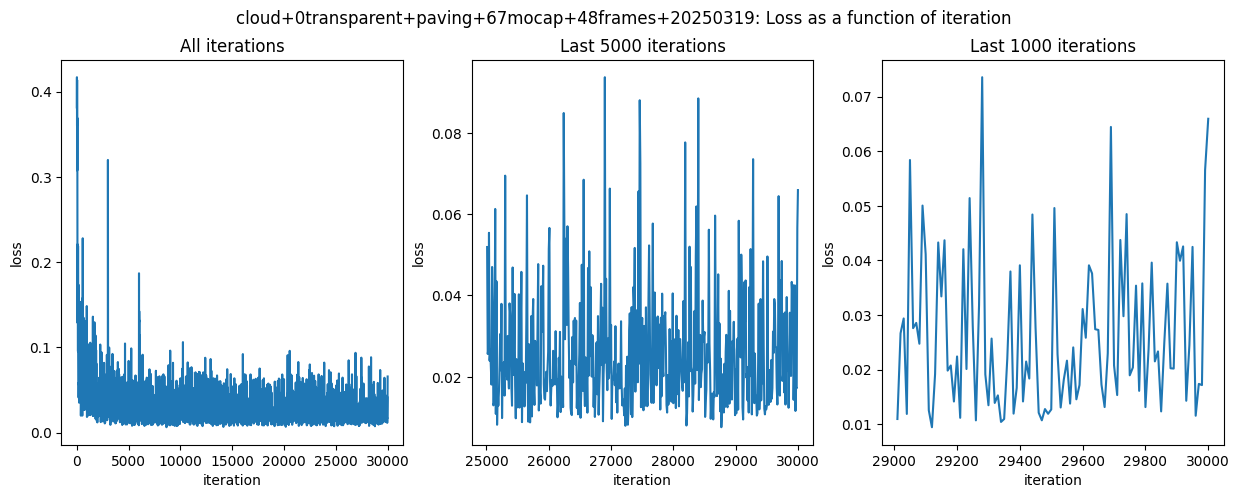

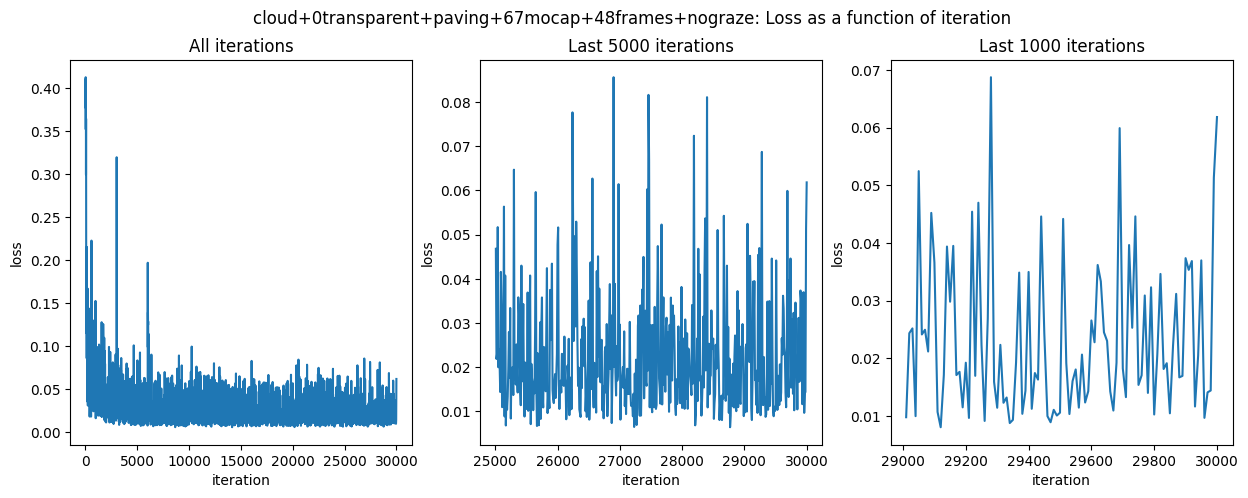

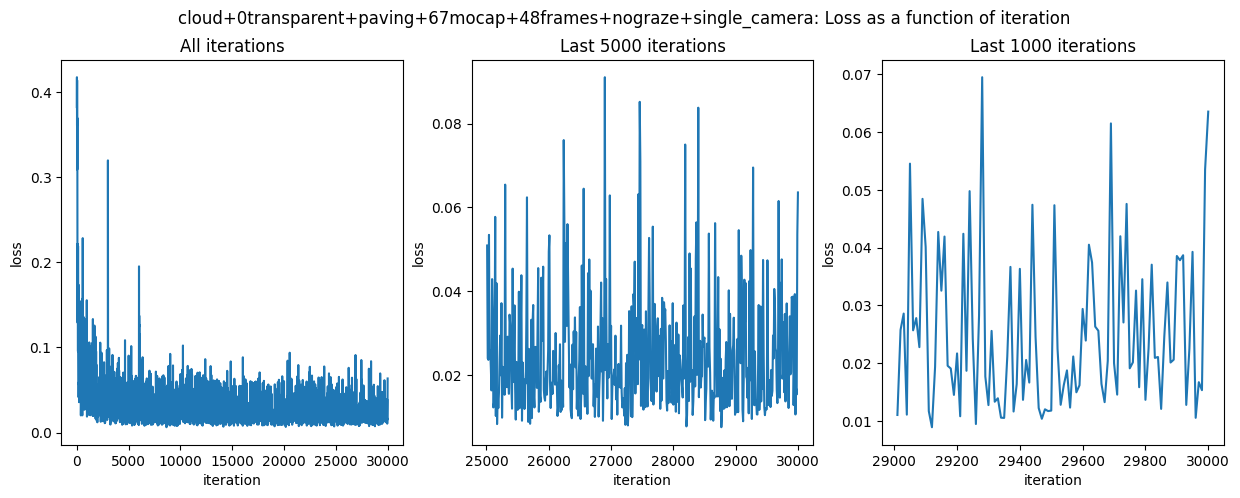

In [3]:
for csv_file_name in cloud_names:
    with open(csv_file_name, 'r') as csv_file:
        data = pd.read_csv(csv_file, delimiter=' ')

    fig, ax = plt.subplots(1, 1+len(plot_tails), figsize=(15, 5))
    ax[0].set_title('All iterations')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('loss')
    ax[0].plot(data['iteration'], data['loss'])
    for (i, tail) in enumerate(plot_tails):
        ax[i+1].set_title(f'Last {tail} iterations')
        ax[i+1].set_xlabel('iteration')
        ax[i+1].set_ylabel('loss')
        n_points = int(tail/tails_data_resolution)
        ax[i+1].plot(
            data['iteration'].tail(n_points),
            data['loss'].tail(n_points))
    fig.suptitle(
        f"{csv_file_name.split('/')[-2]}: Loss as a function of iteration")
    fig.show()

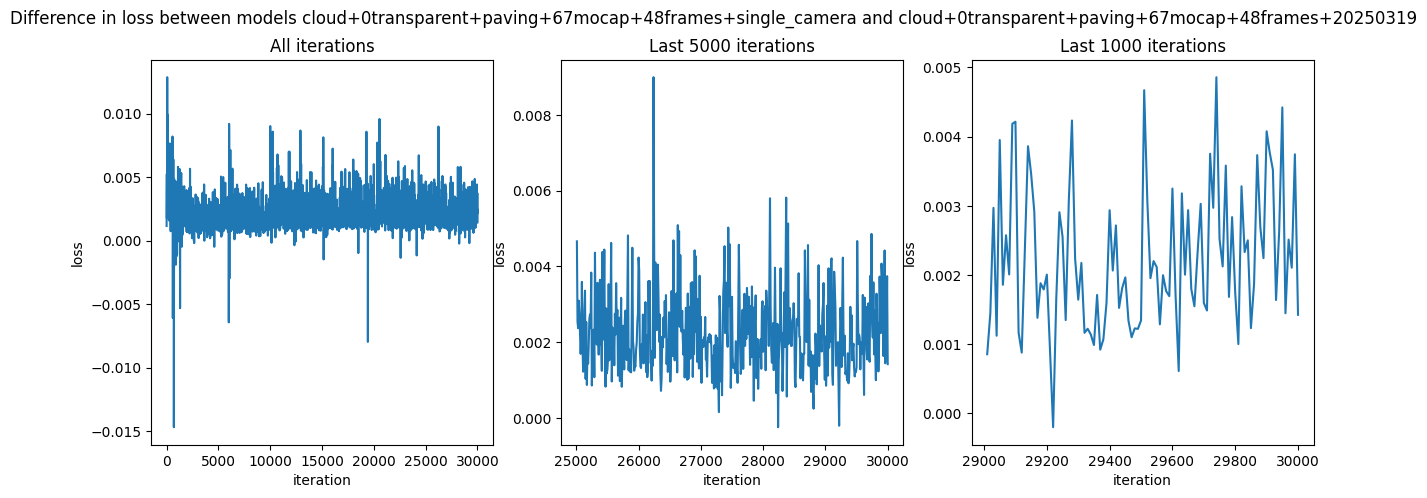

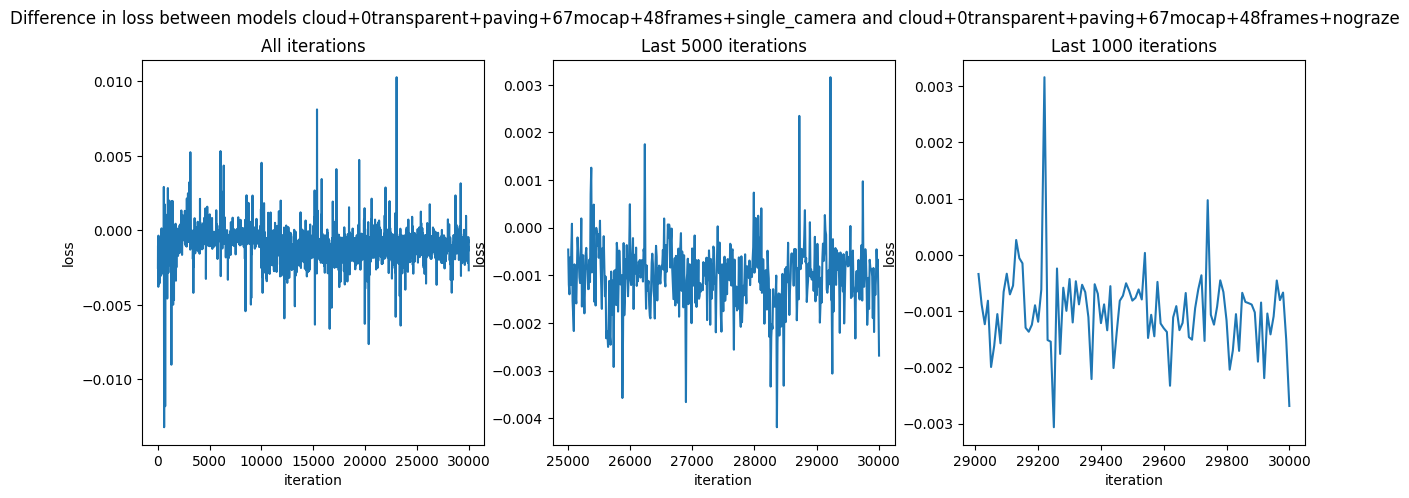

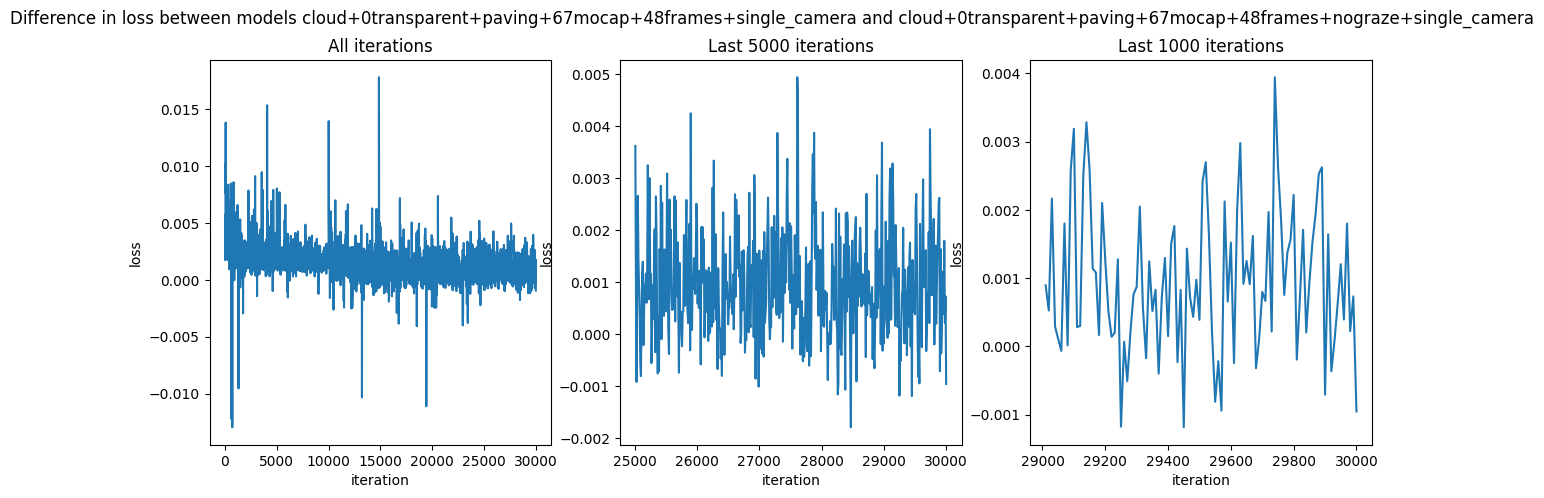

In [4]:
csv_files = [open(name, 'r') for name in cloud_names]
loss_data = [pd.read_csv(csv_file, delimiter=' ') for csv_file in csv_files]
for (n, name) in it.islice(enumerate(cloud_names), 1, None):
    difference = pd.DataFrame({
        "iteration": loss_data[n]['iteration'],
        "delta Loss": loss_data[n]['loss']-loss_data[0]["loss"]})
    fig, ax = plt.subplots(1, 1+len(plot_tails), figsize=(15, 5))
    fig.suptitle(f'Difference in loss between models {cloud_names[0].split('/')[-2]} and {cloud_names[n].split("/")[-2]}')
    ax[0].set_title(f'All iterations')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('loss')
    ax[0].plot(
        difference['iteration'],
        difference['delta Loss'])
    for (i, tail) in enumerate(plot_tails):
        ax[i+1].set_title(f'Last {tail} iterations')
        ax[i+1].set_xlabel('iteration')
        ax[i+1].set_ylabel('loss')
        n_points = int(tail/tails_data_resolution)
        ax[i+1].plot(
            difference['iteration'].tail(n_points),
            difference['delta Loss'].tail(n_points))
    fig.show()